<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.</p>
<p>You can check the documentation <a href="http://scikit-learn.org/stable/datasets/index.html">here</a></p>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()


<h3>Q.0.1 Print the object type of iris</h3>

In [2]:
# Put the command (or commands) here that would give the answer to the above question.
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [3]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


<h3>Q.0.2 What do the iris.target_names represent</h3>

In [4]:
# Describe what the iris.target_names represent
# Dictionary-like object, the interesting attributes are: 
# ‘target’, the classification labels, 
# ‘target_names’, the meaning of the labels, 

In [5]:
print(list(iris.feature_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<h3>Q.0.3 What do the iris.feature_names represent</h3>

In [6]:
# Describe what the iris.feature_names represent
# Dictionary-like object, the interesting attributes are: 
# ‘data’, the data to learn, 
# ‘feature_names’, the meaning of the features, 


In [7]:
# print the integers representing the species of each observation
print (iris.target)
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
# data.dtypes
data.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Q.1. How many observations are present for each species?</h3>

In [8]:
# Put the command (or commands) here that would give an answer to the above question.

data.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

In [9]:
type(data['petal length (cm)'])
petal_length = data['petal length (cm)']
petal_width = data['petal width (cm)']
# print(petal_length.describe())
# print(petal_width.describe())

x_axis_min = min(petal_length.min(), petal_width.min())
x_axis_max = min(petal_length.max(), petal_width.max())
print("x_min is " + str(x_axis_min) + ", x_max is " + str(x_axis_max))

sepal_length = data['sepal length (cm)']
sepal_width = data['sepal width (cm)']

y_axis_min = min(sepal_length.min(), sepal_width.min())
y_axis_max = min(sepal_length.max(), sepal_width.max())
print("y_min is " + str(y_axis_min) + ", y_max is " + str(y_axis_max))



x_min is 0.1, x_max is 2.5
y_min is 2.0, y_max is 4.4


<Figure size 432x288 with 0 Axes>

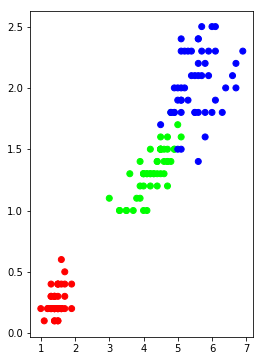

In [10]:
# Write the two plot commands here
#TODO
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# create a custom colormap
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
fig = plt.figure(figsize=(4, 6))

plt.scatter(petal_length, petal_width, c=data.label, cmap=cmap_bold)

plt.show()

<Figure size 432x288 with 0 Axes>

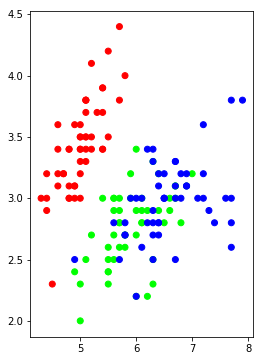

In [11]:
plt.figure()
fig = plt.figure(figsize=(4, 6))

plt.scatter(sepal_length, sepal_width, c=data.label, cmap=cmap_bold)

plt.show()

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

In [12]:
# Identify the plot that clearly separates the classes
# pedel lenght vs pedel width

<br>
<p>After the initial exploratory data analysis.</p>

<h3>Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:</h3>

In [13]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)


(150, 4) (105, 4) (45, 4) (150,) (105,) (45,)


<h3>Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.</h3>

In [14]:

X_train_petal=X_train[:,2:4]
X_test_petal=X_test[:,2:4]
print(X_train.shape, X_train_petal.shape)


(105, 4) (105, 2)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
clf.fit(X=X_train_petal,y=y_train)

# Predicting the Test set results
y_pred = clf.predict(X=X_test_petal)

<h3>Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics</h3>

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[19  0  0]
 [ 0 13  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


<h3>Q.7. What accuracy did you obtain?</h3>

In [17]:
# .93

<h3>Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.</h3>

In [18]:
# Instantiate learning model (k = 3)
clf_n3 = KNeighborsClassifier(n_neighbors=3, p=2)

# Fitting the model
clf_n3.fit(X=X_train_petal,y=y_train)

# Predicting the Test set results
y_pred_n3 = clf_n3.predict(X=X_test_petal)

print(confusion_matrix(y_test, y_pred_n3))  
print(classification_report(y_test, y_pred_n3))
print(accuracy_score(y_test, y_pred_n3))

[[19  0  0]
 [ 0 13  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


In [19]:
# Instantiate learning model (k = 3)
clf_n3_p1 = KNeighborsClassifier(n_neighbors=3, p=1)

# Fitting the model
clf_n3_p1.fit(X=X_train_petal,y=y_train)

# Predicting the Test set results
y_pred_n3_p1 = clf_n3_p1.predict(X=X_test_petal)

print(confusion_matrix(y_test, y_pred_n3_p1))  
print(classification_report(y_test, y_pred_n3_p1))
print(accuracy_score(y_test, y_pred_n3_p1))

[[19  0  0]
 [ 0 13  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


In [20]:
# Instantiate learning model (k = 3)
clf_n5 = KNeighborsClassifier(n_neighbors=5, p=2)

# Fitting the model
clf_n5.fit(X=X_train_petal,y=y_train)

# Predicting the Test set results
y_pred_n5 = clf_n5.predict(X=X_test_petal)

print(confusion_matrix(y_test, y_pred_n5))  
print(classification_report(y_test, y_pred_n5))
print(accuracy_score(y_test, y_pred_n5))

[[19  0  0]
 [ 0 12  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


In [21]:
# Instantiate learning model (k = 3)
clf_n5_p1 = KNeighborsClassifier(n_neighbors=5, p=1)

# Fitting the model
clf_n5_p1.fit(X=X_train_petal,y=y_train)

# Predicting the Test set results
y_pred_n5_p1 = clf_n5_p1.predict(X=X_test_petal)

print(confusion_matrix(y_test, y_pred_n5_p1))  
print(classification_report(y_test, y_pred_n5_p1))
print(accuracy_score(y_test, y_pred_n5_p1))

[[19  0  0]
 [ 0 12  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

In [22]:
# 1. Choosing the most applicable set of variables
# 2. Choosing an optimal value for k for kNN
# 3. Not overfitting the data in general
# 4. Choosing the best choice for parameter p (chooses manhatten distance vs euclidian distance)

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Add your response here